# Regressão Linear

### Introdução
Neste notebook, vamos explorar o conceito de **Regressão Linear**, uma técnica de aprendizado supervisionado usada para prever valores numéricos. Usaremos um conjunto de dados de preços de carros, obtido no [Kaggle](https://www.kaggle.com), para construir um modelo de regressão linear que ajudará a entender como o preço varia com as características dos carros. Pode acessar o conjunto de dados [aqui](https://www.kaggle.com/datasets/ngawangchoeda/car-price-dataset).

A **Regressão Linear** é um método estatístico que tenta modelar a relação entre uma variável dependente (neste caso, o preço dos carros) e uma ou mais variáveis independentes (como características dos carros, por exemplo, tamanho do motor, tipo de combustível, entre outras). A ideia é encontrar uma linha reta (ou hiperplano, no caso de múltiplas variáveis) que melhor se ajusta aos pontos de dados disponíveis, minimizando a soma dos erros ao quadrado entre os valores previstos e os valores reais.

Essa técnica é amplamente utilizada em problemas de previsão e é particularmente útil quando há uma suposição de uma relação linear entre as variáveis. Ao ajustar o modelo de regressão linear, podemos entender quais características têm maior impacto no preço do carro e como essas variáveis se relacionam.

### Objectivo
Nosso objetivo é modelar o preço dos carros usando a regressão linear com as variáveis independentes fornecidas e interpretar os resultados para entender as relações entre as variáveis.


### Importação das Bibliotecas Necessárias
Nesta seção, importamos as bibliotecas essenciais para a análise de dados e visualização

Se ainda não tiver instalado as bibliotecas abaixo, remova o `#` e execute a célula abaixo para instalar antes de continuar.

In [39]:
# !pip install numpy pandas matplotlib seaborn

In [12]:
# Carregar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregar o Conjunto de DadosVamosa carregar o conjunto de dados e a selecionar algumas variáveis específicas para transformação.

Os dados foram obtidos no Kaggle. Pode aceder ao conjunto de dados [aqui](https://www.kagglem.co).


In [46]:
# Carregar o conjunto de dados a partir do link fornecido
file_url = 'https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/refs/heads/main/datasets/aprendizagem-supervisionada/CarPrice_Assignment.csv'
df = pd.read_csv(file_url)

### Visualização dos Primeiros Dados

Depois de carregar o conjunto de dados, vamos apresentar as primeiras linhas para obter uma visão geral das variáveis disponíveis e de seus valores.


In [48]:
# Apresentar as primeiras linhas do conjunto de dados
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Entendendo os Dados
Nesta etapa, verificamos o formato dos dados, incluindo o número de entradas e tipos de variáveis. Isso nos ajudará a entender o que estamos lidando e como preparar os dados.

In [17]:
# Exibir informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Análise Visual Inicial
Vamos visualizar a distribuição dos preços dos carros e sua dispersão. Estas visualizações nos ajudarão a identificar características dos preços, como a presença de outliers e a forma da distribuição.

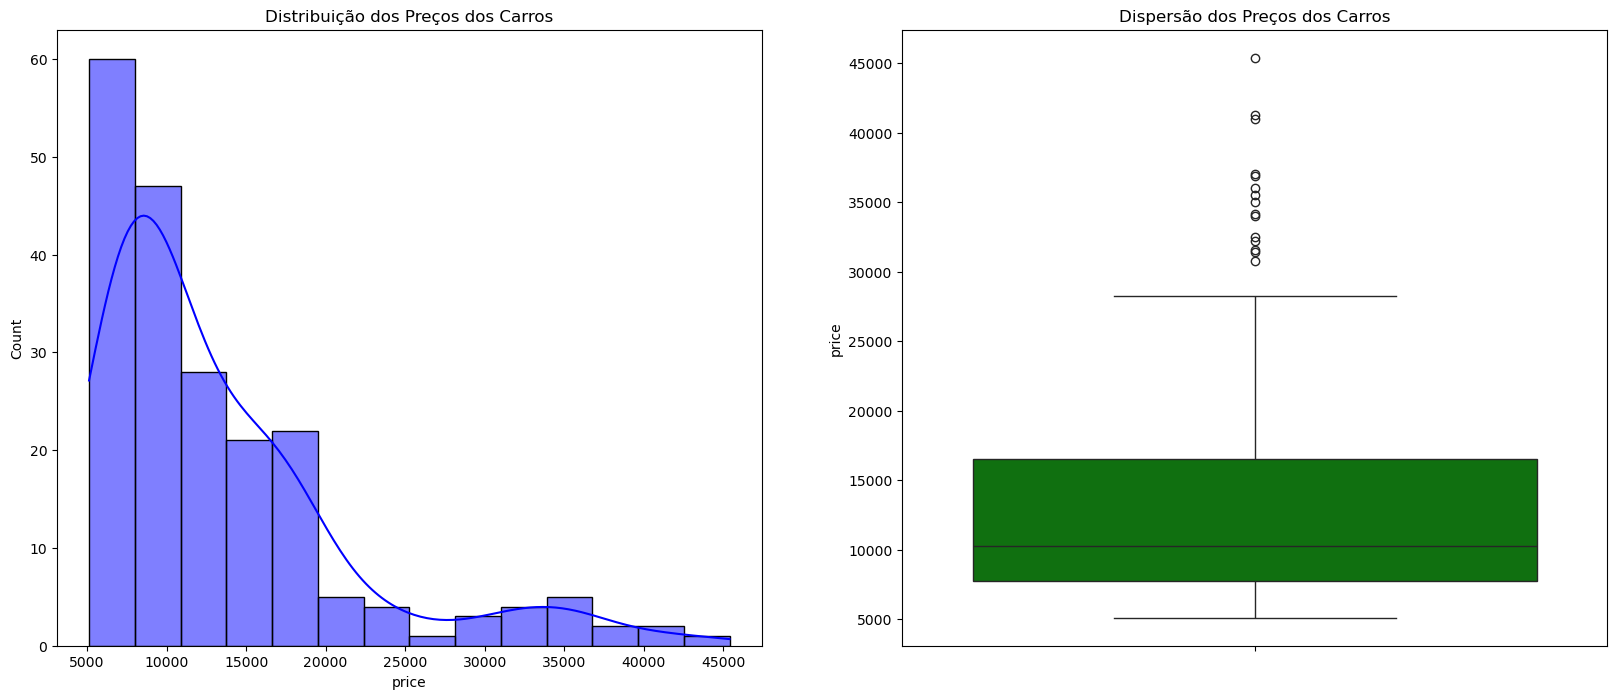

In [20]:
plt.figure(figsize=(20, 8))

# Grafico da distribuição do preço dos carros
plt.subplot(1, 2, 1)
plt.title('Distribuição dos Preços dos Carros')
sns.histplot(df['price'], kde=True, color='blue')

# Exibir o preço dos carros em um boxplot para analisar dispersão
plt.subplot(1, 2, 2)
plt.title('Dispersão dos Preços dos Carros')
sns.boxplot(y=df['price'], color='green')

plt.show()

### Interpretação dos Gráfico dos Preços dos Carros

No gráfico da distribuição dos preços, podemos observar como os preços dos carros estão distribuídos no dataset. A linha azul (Kernel Density Estimate) mostra a densidade dos dados ao longo da faixa de preços, permitindo identificar quais faixas de preços são mais comuns.

No boxplot ao lado, podemos ver a dispersão dos preços. A linha central do boxplot representa a mediana dos preços, enquanto os limites da caixa mostram os quartis (25% e 75%). Também podemos identificar outliers como pontos fora dos limites das "whiskers" (linhas finas). Estes outliers são carros que são significativamente mais caros ou mais baratos do que a maioria.

### Comparações Par a Par e Seleção das Variáveis para o Modelo
Para construir um modelo, é importante compreender a relação entre as variáveis. Vamos calcular a matriz de correlação e visualizar como cada variável numérica está relacionada com o preço. Escolheremos então a variável mais significativa para o modelo.

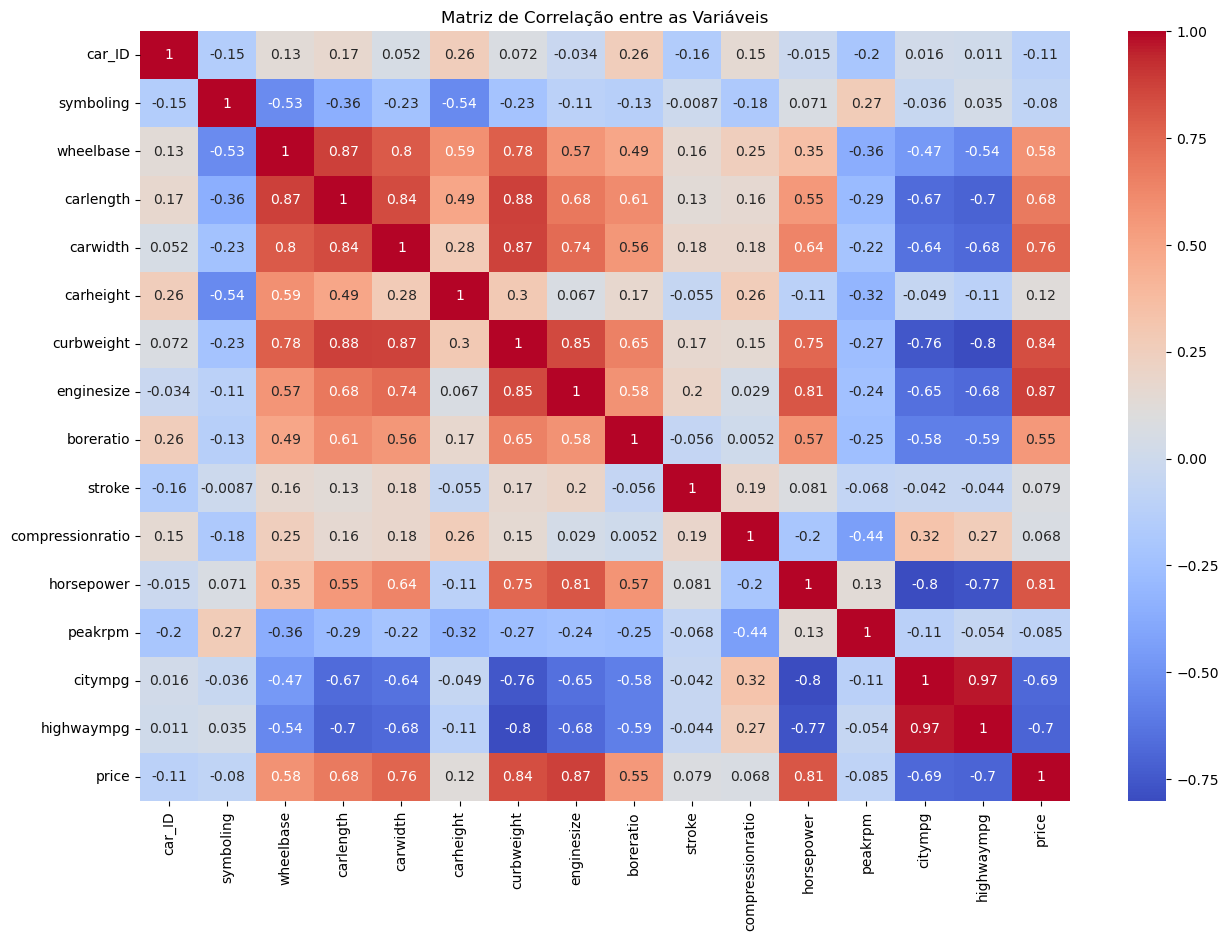

In [23]:
# Calcular a matriz de correlação considerando apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Fazer o grafico da matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

### Explicando a Matriz de Correlação

A matriz de correlação é uma ferramenta importante para entender as relações entre variáveis numéricas no dataset. Cada célula na matriz mostra um coeficiente de correlação entre duas variáveis, que varia de -1 a 1.

Um valor próximo de 1 indica uma correlação positiva forte — conforme uma variável aumenta, a outra tende a aumentar também. Um valor próximo de -1 indica uma correlação negativa forte — conforme uma variável aumenta, a outra tende a diminuir. No nosso caso, observamos a relação entre `enginesize` e `price`, que apresenta um valor alto (0.87), indicando uma forte correlação positiva. Isso significa que carros com motores maiores tendem a ser mais caros.


In [26]:
df_selected = df[['price', 'enginesize']]
df_selected.head()

,price,enginesize
0,13495.0,130
1,16500.0,130
2,16500.0,152
3,13950.0,109
4,17450.0,136


### Dividindo o Dataset em Conjuntos de Treinamento e Teste
Vamos dividir os dados em dois conjuntos: um para treinar o modelo e outro para testar sua performance. Isso é essencial para avaliar a capacidade preditiva do modelo.

In [29]:
from sklearn.model_selection import train_test_split

# Definir X e y
X = df_selected[['enginesize']]
y = df_selected['price']

# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Importância da Divisão do Conjunto de Dados

Dividir o conjunto de dados em treinamento (70%) e teste (30%) é uma prática fundamental para garantir que o modelo seja capaz de fazer boas previsões em dados que ele nunca viu antes. O conjunto de treinamento é utilizado para "ensinar" o modelo, enquanto o conjunto de teste serve para avaliar a capacidade do modelo de generalizar para novos dados.

Esta divisão nos permite medir a precisão do modelo em um contexto que simula sua aplicação no mundo real.


### Construindo o Modelo de Regressão Linear com Uma Variável
Vamos agora construir o modelo de Regressão Linear com a variável 'horsepower' usando a biblioteca Scikit-Learn.

In [32]:
from sklearn.linear_model import LinearRegression

# Criar o modelo
tlm = LinearRegression()

# Ajustar o modelo aos dados de treinamento
tlm.fit(X_train, y_train)

LinearRegression()

### Avaliando o Modelo
Após o treinamento, é hora de avaliar a performance do modelo. Vamos calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²) para medir a precisão das previsões.

In [35]:
# Fazer previsões
y_pred = tlm.predict(X_test)

# Avaliar o desempenho do modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 17079275.21406684
R^2 Score: 0.7534902447506853


### Avaliando o Desempenho do Modelo

Após treinar o modelo, usamos duas métricas principais para avaliar sua performance:

- **Erro Quadrático Médio (MSE)**: Mede a média dos erros ao quadrado entre os valores reais e os valores previstos. Quanto menor o MSE, melhor o modelo.
- **R² Score**: Mostra a proporção da variação do preço explicada pela variável `enginesize`. Um valor próximo de 1 indica que o modelo explica bem a variação nos preços, enquanto um valor próximo de 0 indica que o modelo não é muito bom em prever os preços com base nos dados fornecidos.

Essas métricas nos ajudam a entender se o modelo que criamos está funcionando de forma adequada para prever preços de carros.


### Visualizando o Ajuste do Modelo com Uma Variável
ara melhor compreensão do desempenho do modelo, vamos criar um gráfico que mostra a linha de regressão ajustada em relação aos dados reais de teste.

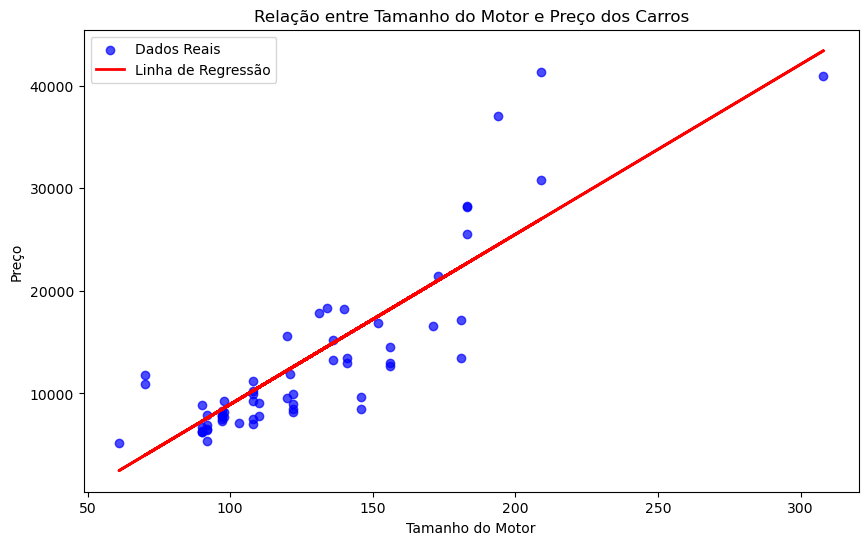

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.7, color='b', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Preço')
plt.title('Relação entre Tamanho do Motor e Preço dos Carros')
plt.legend()
plt.show()

### Interpretação da Linha de Regressão

No gráfico de dispersão, os pontos azuis representam os preços reais dos carros (no conjunto de teste) em função do tamanho do motor. A linha vermelha é a linha de regressão que foi ajustada pelo modelo.

Podemos ver que a linha tenta passar o mais próximo possível dos pontos azuis, indicando como o modelo está tentando prever os preços com base no tamanho do motor. A linha de regressão nos mostra que, conforme o tamanho do motor aumenta, o preço também tende a aumentar. No entanto, observe que alguns pontos estão distantes da linha, sugerindo que nem todos os preços podem ser previstos com precisão apenas com base no tamanho do motor — indicando que outras variáveis também podem ser importantes.


### Implicações do Resultado
Os resultados obtidos indicam que há uma relação positiva entre o tamanho do motor (enginesize) e o preço. A linha de regressão demonstra que, conforme o tamanho do motor aumenta, o preço também tende a aumentar. No entanto, o valor do R^2 mostra a quantidade de variação no preço que é explicada pela variável 'enginesize'. Podemos explorar mais variáveis ou técnicas avançadas para melhorar a precisão do modelo.

### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).